<a href="https://colab.research.google.com/github/mhaider484-creator/COM762-Deep-Learning-Projects/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(50000, 32, 32, 3)
(50000, 1)


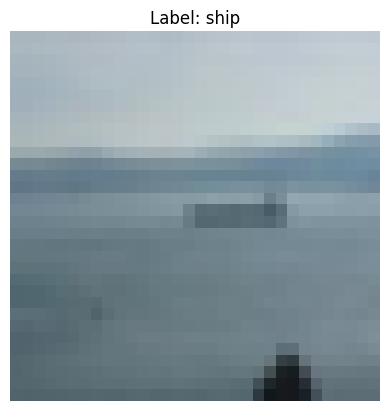

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 142ms/step - accuracy: 0.3608 - loss: 1.7714
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 138ms/step - accuracy: 0.5465 - loss: 1.2739
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 139ms/step - accuracy: 0.6004 - loss: 1.1385
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - accuracy: 0.6348 - loss: 1.0410
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - accuracy: 0.6618 - loss: 0.9739
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 137ms/step - accuracy: 0.6747 - loss: 0.9398
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 139ms/step - accuracy: 0.6987 - loss: 0.8697
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 138ms/step - accuracy: 0.7092 - loss: 0.8413
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.7243 - loss: 0.7938
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.7348 - loss: 0.7606
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6916 - loss: 0.9001
Test Accuracy: 0.6915000081062317

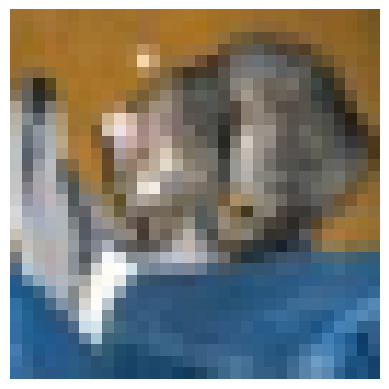

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# LOAD CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(x_train.shape)  # (50000, 32, 32, 3)
print(y_train.shape)  # (50000, 1)

# Normalize (important!)
x_train = x_train / 255.0
x_test = x_test / 255.0

class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

idx = 5999

plt.imshow(x_train[idx])
plt.title(f"Label: {class_names[y_train[idx][0]]}")
plt.axis("off")
plt.show()

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128
)

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

prediction = model.predict(x_test)

print("Predicted Class:", class_names[prediction[0].argmax()])
print("True Class:", class_names[y_test[0][0]])

plt.imshow(x_test[0])
plt.axis("off")
plt.show()

